In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from time import time
from IPython.display import display
!pip install vpython
%matplotlib inline

In [3]:
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

In [4]:
data=pd.read_csv("C:\\Users\\channu\\Downloads\\SalaryData_Test.csv")

In [5]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [10]:
categorical =[var for var in data.columns if data[var].dtype=='O']

In [11]:
print('categorical varibles are', categorical)

categorical varibles are ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [12]:
data[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [13]:
data[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [14]:
for var in categorical:
    print(data[var].value_counts())
      

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64
 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-servic

In [15]:
for var in categorical:
    print(data[var].value_counts()/np.float(len(data)))

 Private             0.731806
 Self-emp-not-inc    0.086122
 Local-gov           0.068592
 State-gov           0.044290
 Self-emp-inc        0.037981
 Federal-gov         0.030744
 Without-pay         0.000465
Name: workclass, dtype: float64
 HS-grad         0.328220
 Some-college    0.213878
 Bachelors       0.167729
 Masters         0.058898
 Assoc-voc       0.043293
 11th            0.037915
 Assoc-acdm      0.033134
 10th            0.026760
 7th-8th         0.017663
 Prof-school     0.016135
 9th             0.014675
 12th            0.013280
 Doctorate       0.011222
 5th-6th         0.010691
 1st-4th         0.004714
 Preschool       0.001793
Name: education, dtype: float64
 Married-civ-spouse       0.464143
 Never-married            0.323506
 Divorced                 0.138313
 Separated                0.031341
 Widowed                  0.029880
 Married-spouse-absent    0.012085
 Married-AF-spouse        0.000730
Name: maritalstatus, dtype: float64
 Exec-managerial      0.13227

In [17]:
for var in categorical:
    
    print(var, ' contains ', len(data[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [19]:
numeric = [var for var in data.columns if data[var].dtype!='O']

In [20]:
print('numeric var in numeric',numeric)

numeric var in numeric ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [21]:
data[numeric].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30


In [22]:
data[numeric].tail()

,age,educationno,capitalgain,capitalloss,hoursperweek
15055,33,13,0,0,40
15056,39,13,0,0,36
15057,38,13,0,0,50
15058,44,13,5455,0,40
15059,35,13,0,0,60


In [24]:
data.shape

(15060, 14)

In [25]:
data[numeric].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [26]:
for var in numeric:
    print(data[var].value_counts())

35    444
33    442
36    431
31    423
38    420
     ... 
88      2
85      2
89      1
84      1
87      1
Name: age, Length: 73, dtype: int64
9     4943
10    3221
13    2526
14     887
11     652
7      571
12     499
6      403
4      266
15     243
5      221
8      200
16     169
3      161
2       71
1       27
Name: educationno, dtype: int64
0        13808
15024      161
7688       121
7298       111
99999       81
         ...  
5060         1
7262         1
2346         1
1173         1
2036         1
Name: capitalgain, Length: 110, dtype: int64
0       14347
1902      100
1977       84
1887       73
2415       23
        ...  
2282        1
1594        1
2163        1
2467        1
1911        1
Name: capitalloss, Length: 79, dtype: int64
40    7107
50    1376
45     849
60     680
35     592
      ... 
76       1
73       1
89       1
69       1
79       1
Name: hoursperweek, Length: 89, dtype: int64


In [28]:
x = data.drop(['Salary'], axis=1)

y = data['Salary']

In [30]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='count', ylabel='workclass'>

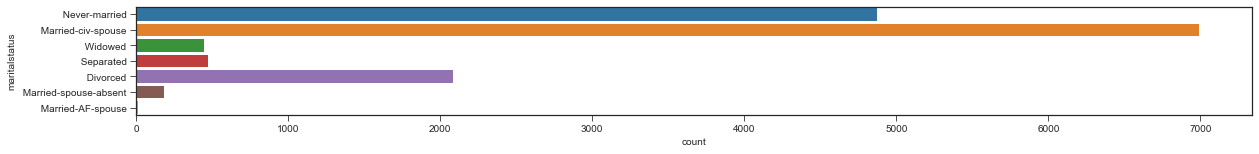

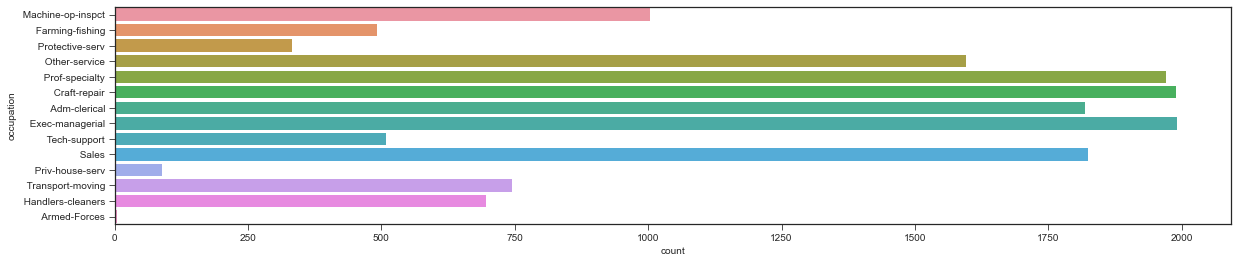

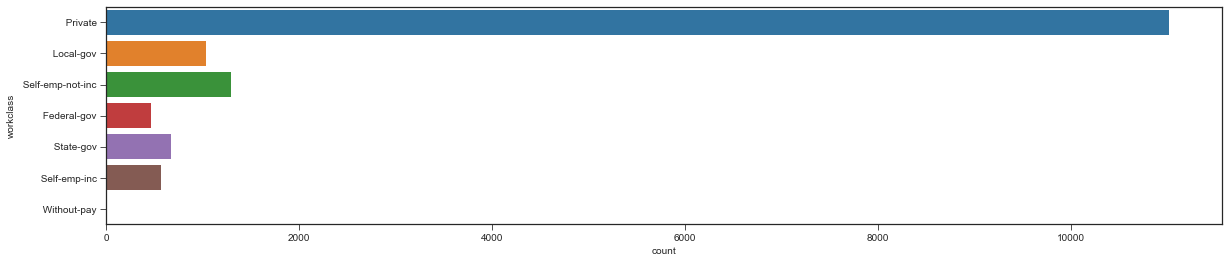

In [32]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="maritalstatus", data=data)
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=data)
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="workclass", data=data)



C:\Users\channu\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\channu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='hoursperweek'>

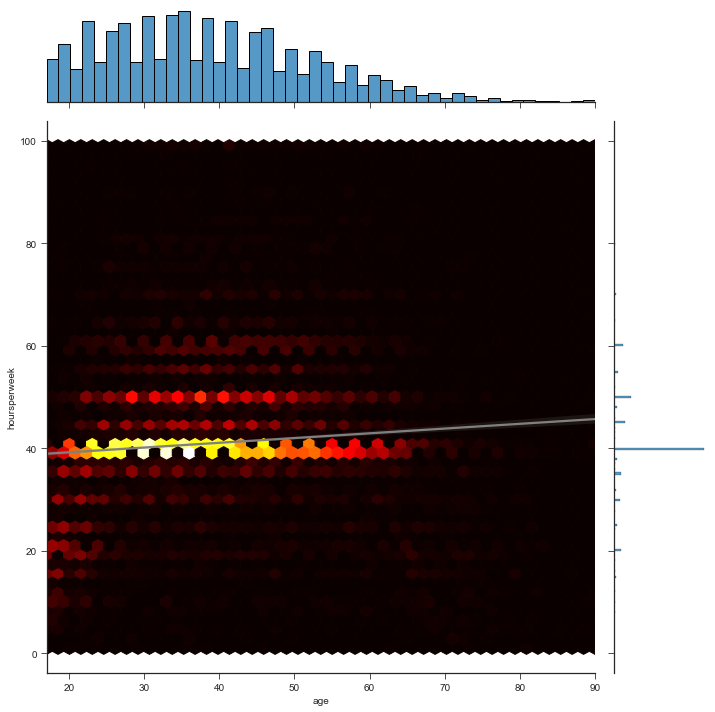

In [34]:
g = sns.jointplot(x = 'age', 
              y = 'hoursperweek',
              data = data, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)
sns.regplot(data.age, data['hoursperweek'], ax=g.ax_joint, scatter=False, color='grey')


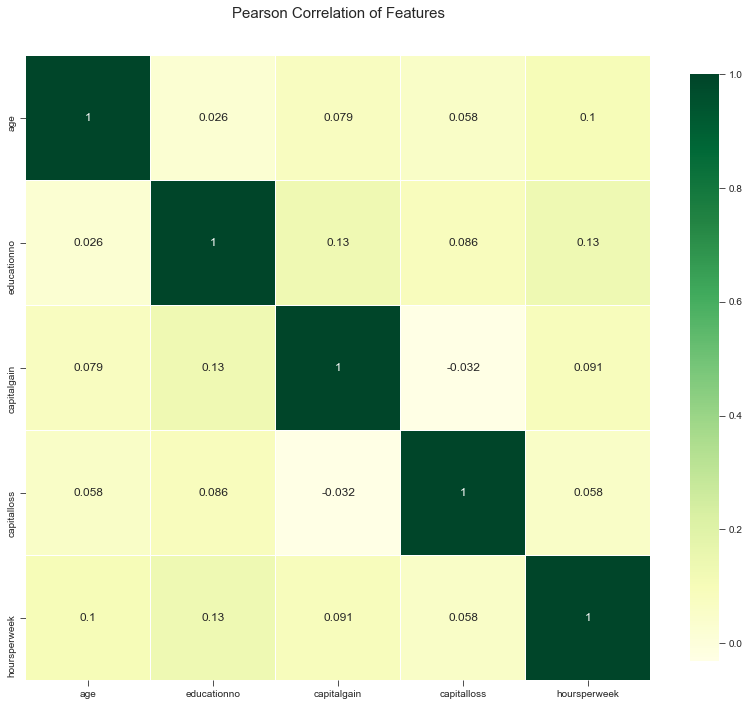

In [35]:
#correlation heatmap of dataset
def correlation_heatmap(data):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        data.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
correlation_heatmap(data)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [37]:
x_train.shape,y_train.shape

((10542, 13), (10542,))

In [39]:
x_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [42]:
categorical=[col for col in x_train.columns if x_train[col].dtype=='O']

In [43]:
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [44]:
for col in categorical:
    if x_train[col].isnull().mean()>0:
        print(col, (x_train[col].isnull().mean()))      

In [46]:
print(col, (x_train[col].isnull().mean()))

native 0.0


In [47]:
x_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [48]:
x_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [49]:
x_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [50]:
x_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [51]:
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [52]:
x_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
4324,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2179,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,India
1906,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,Black,Female,United-States
5206,Private,HS-grad,Divorced,Sales,Not-in-family,White,Female,United-States
4659,Private,HS-grad,Never-married,Craft-repair,Own-child,White,Male,United-States


In [55]:
! pip install category_encoders

In [56]:
import category_encoders as ce

#  one hot encodeing

In [58]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])


In [60]:
x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

C:\Users\channu\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [61]:
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
4324,41,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2179,53,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1906,65,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5206,63,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4659,23,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
x_train.shape

(10542, 102)

In [63]:
x_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
4269,37,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7027,61,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8418,41,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10064,23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3305,29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
cols = x_train.columns

In [65]:
from sklearn.preprocessing import RobustScaler
scaler =  RobustScaler()

In [66]:
x_train = scaler.fit_transform(x_train)

In [67]:
x_test = scaler.transform(x_test)

In [69]:
x_train = pd.DataFrame(x_train ,columns=[cols])
x_test = pd.DataFrame(x_test , columns=[cols])
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.8,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()

In [72]:
gnb.fit(x_train,y_train)

GaussianNB()

In [74]:
y_pred = gnb.predict(x_test)

y_pred

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [75]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8028


In [77]:
y_pred_train = gnb.predict(x_train)

y_pred_train

array([' >50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [78]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8017


In [80]:
print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.8017
Test set score: 0.8028


In [81]:
y_test.value_counts()

 <=50K    3385
 >50K     1133
Name: Salary, dtype: int64

In [82]:
null_accuracy= (7407/(7407+2362))

In [83]:
print('null accuracy',format(null_accuracy))

null accuracy 0.7582147609786057


In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [85]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2709  676]
 [ 215  918]]

True Positives(TP) =  2709

True Negatives(TN) =  918

False Positives(FP) =  676

False Negatives(FN) =  215


<AxesSubplot:>

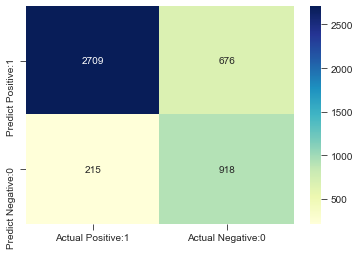

In [86]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      3385
        >50K       0.58      0.81      0.67      1133

    accuracy                           0.80      4518
   macro avg       0.75      0.81      0.77      4518
weighted avg       0.84      0.80      0.81      4518



In [88]:
#Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [93]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8028


In [94]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1972


In [95]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8003


In [96]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9265


In [98]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9265


In [99]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4241


In [101]:
y_pred_prob = gnb.predict_proba(x_test)[0:10]

y_pred_prob

array([[3.48154770e-02, 9.65184523e-01],
       [9.99971965e-01, 2.80346728e-05],
       [9.58220760e-01, 4.17792398e-02],
       [9.99998598e-01, 1.40217160e-06],
       [7.44380787e-02, 9.25561921e-01],
       [9.99011204e-01, 9.88795606e-04],
       [9.99999974e-01, 2.63003814e-08],
       [9.99999999e-01, 9.51848857e-10],
       [2.69689128e-01, 7.30310872e-01],
       [8.01706993e-09, 9.99999992e-01]])

In [102]:
y_pred_prob_data= pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_data

,Prob of - <=50K,Prob of - >50K
0,3.481548e-02,9.651845e-01
1,9.999720e-01,2.803467e-05
2,9.582208e-01,4.177924e-02
3,9.999986e-01,1.402172e-06
4,7.443808e-02,9.255619e-01
5,9.990112e-01,9.887956e-04
6,1.000000e+00,2.630038e-08
7,1.000000e+00,9.518489e-10
8,2.696891e-01,7.303109e-01
9,8.017070e-09,1.000000e+00


In [105]:
y_pred1 = gnb.predict_proba(x_test)[:, 1]
y_pred1

array([9.65184523e-01, 2.80346728e-05, 4.17792398e-02, ...,
       5.82472551e-02, 9.99948170e-01, 6.40245003e-07])

Text(0, 0.5, 'Frequency')

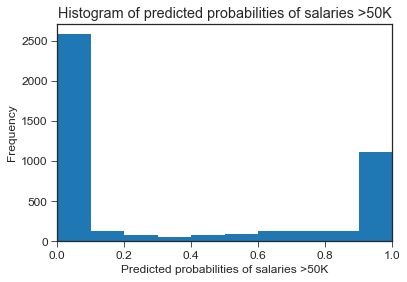

In [106]:
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

C:\Users\channu\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


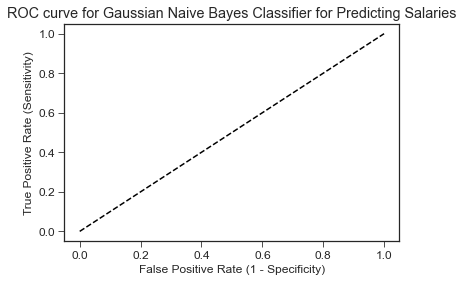

In [107]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '<50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [108]:

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8909


In [110]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score


scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.8        0.78957346 0.81593928 0.80265655 0.80645161 0.77419355
 0.81783681 0.78557875 0.81119545 0.80265655]


In [111]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8006


1)In this project, I build a Gaussian Naïve Bayes Classifier model to predict whether a person makes over 50K a year.

The model yields a very good performance as indicated by the model accuracy which was found to be 0.8028.

2)The training-set accuracy score is 0.8017 while the test-set accuracy to be 0.8028. These two values are quite comparable. So, there is no sign of overfitting.

3)I have compared the model accuracy score which is 0.8028 with null accuracy score which is0.7582. So, we can conclude that our Gaussian Naïve Bayes classifier model is doing a very good job in predicting the class labels.

4)ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a very good job in predicting whether a person makes over 50K a year.

5)Using the mean cross-validation, we can conclude that we expect the model to be around 80.60% accurate on average. If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 81.35% accuracy to 79.64% accuracy. So, we can conclude that the model is independent of the particular folds used for training. Our original model accuracy is 0.8028, but the mean cross-validation accuracy is 0.8003. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.